STEP0: IMPORT NECESSARY LIBRARIES

In [30]:
# Import Necessary Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # For evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF calculation
from sklearn.feature_selection import RFE  # For Recursive Feature Elimination

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

STEP1: LOAD THE DATA SET

In [31]:
# Replace 'train.csv' with the actual path to your dataset if it's located elsewhere
try:
    df = pd.read_csv('train.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'train.csv' was not found. Please check the file path.")
    exit()

Dataset loaded successfully.


STEP2: EDA

In [32]:
# View the First Few Rows
print("\nFirst five rows of the dataset:")
print(df.head())
# Dataset Information
print("\nDataset Information:")
print(df.info())
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
## notice the data set is perfect, don't have any missing values

# we remove the PatientID, Diagnostics and DoctorInCharge
all_variables = df.columns.difference(['PatientID', 'Diagnosis', 'DoctorInCharge'])
print(all_variables)
print("Number of variables that we can use:", len(all_variables))



First five rows of the dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          1   67       0          3               0  37.205177        0   
1          2   65       1          0               0  35.141843        1   
2          3   62       0          1               1  17.875103        0   
3          4   67       0          0               1  37.503437        1   
4          5   65       1          0               2  29.187863        1   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           12.215677          7.780544     6.433890  ...                 1   
1           17.111404          6.645284     1.112379  ...                 0   
2           13.525546          9.585769     4.266008  ...                 0   
3           19.952014          1.953946     6.797333  ...                 0   
4            0.533209          8.759570     6.364302  ...                 1   

   BehavioralProblems       ADL  Co

Explore problems within categorical variables

In [33]:

# find categorical variables
possible_categoricals = df.select_dtypes(include=['int64', 'object']).columns
categorical = []
for col in possible_categoricals:
    if df[col].dtype == 'object' or df[col].nunique() < 10:  # Threshold can be adjusted
        categorical.append(col)
print("Number of Categorical variables:", len(categorical))
print("Categorical variables:", categorical)

# we already know that there are no missing values in categorical variables :)
# Now, I will check the frequency counts of categorical variables.
for var in categorical: 
    print(df[var].value_counts())

# By checking the date set, we don't need to encode and reformate :)

Number of Categorical variables: 19
Categorical variables: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge']
Gender
1    765
0    739
Name: count, dtype: int64
Ethnicity
0    890
1    309
2    154
3    151
Name: count, dtype: int64
EducationLevel
1    588
2    454
0    311
3    151
Name: count, dtype: int64
Smoking
0    1077
1     427
Name: count, dtype: int64
FamilyHistoryAlzheimers
0    1136
1     368
Name: count, dtype: int64
CardiovascularDisease
0    1302
1     202
Name: count, dtype: int64
Diabetes
0    1264
1     240
Name: count, dtype: int64
Depression
0    1191
1     313
Name: count, dtype: int64
HeadInjury
0    1361
1     143
Name: count, dtype: int64
Hypertension
0    1276
1     228
Name: count, d

Explore problems within numerical variables

There are 15 numerical variables

The numerical variables are : Index(['ADL', 'Age', 'AlcoholConsumption', 'BMI', 'CholesterolHDL',
       'CholesterolLDL', 'CholesterolTotal', 'CholesterolTriglycerides',
       'DiastolicBP', 'DietQuality', 'FunctionalAssessment', 'MMSE',
       'PhysicalActivity', 'SleepQuality', 'SystolicBP'],
      dtype='object')
          ADL     Age  AlcoholConsumption     BMI  CholesterolHDL  \
count  1504.0  1504.0              1504.0  1504.0          1504.0   
mean      5.0    75.0                10.0    28.0            60.0   
std       3.0     9.0                 6.0     7.0            23.0   
min       0.0    60.0                 0.0    15.0            20.0   
25%       2.0    67.0                 5.0    21.0            39.0   
50%       5.0    75.0                10.0    28.0            60.0   
75%       8.0    83.0                15.0    34.0            79.0   
max      10.0    90.0                20.0    40.0           100.0   

       CholesterolLDL  C

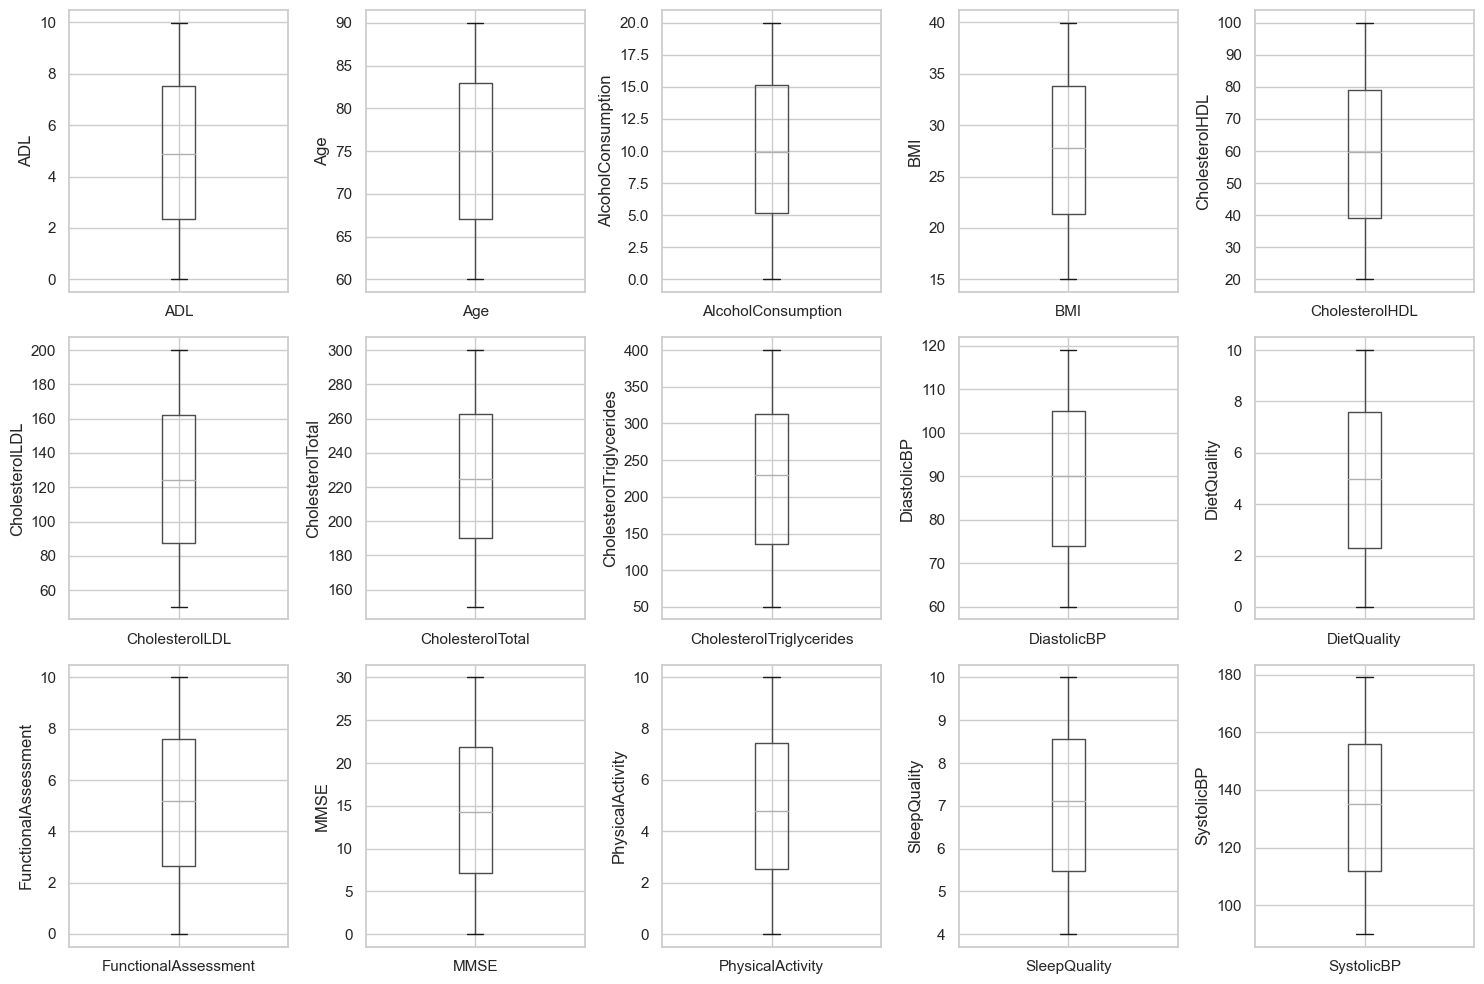

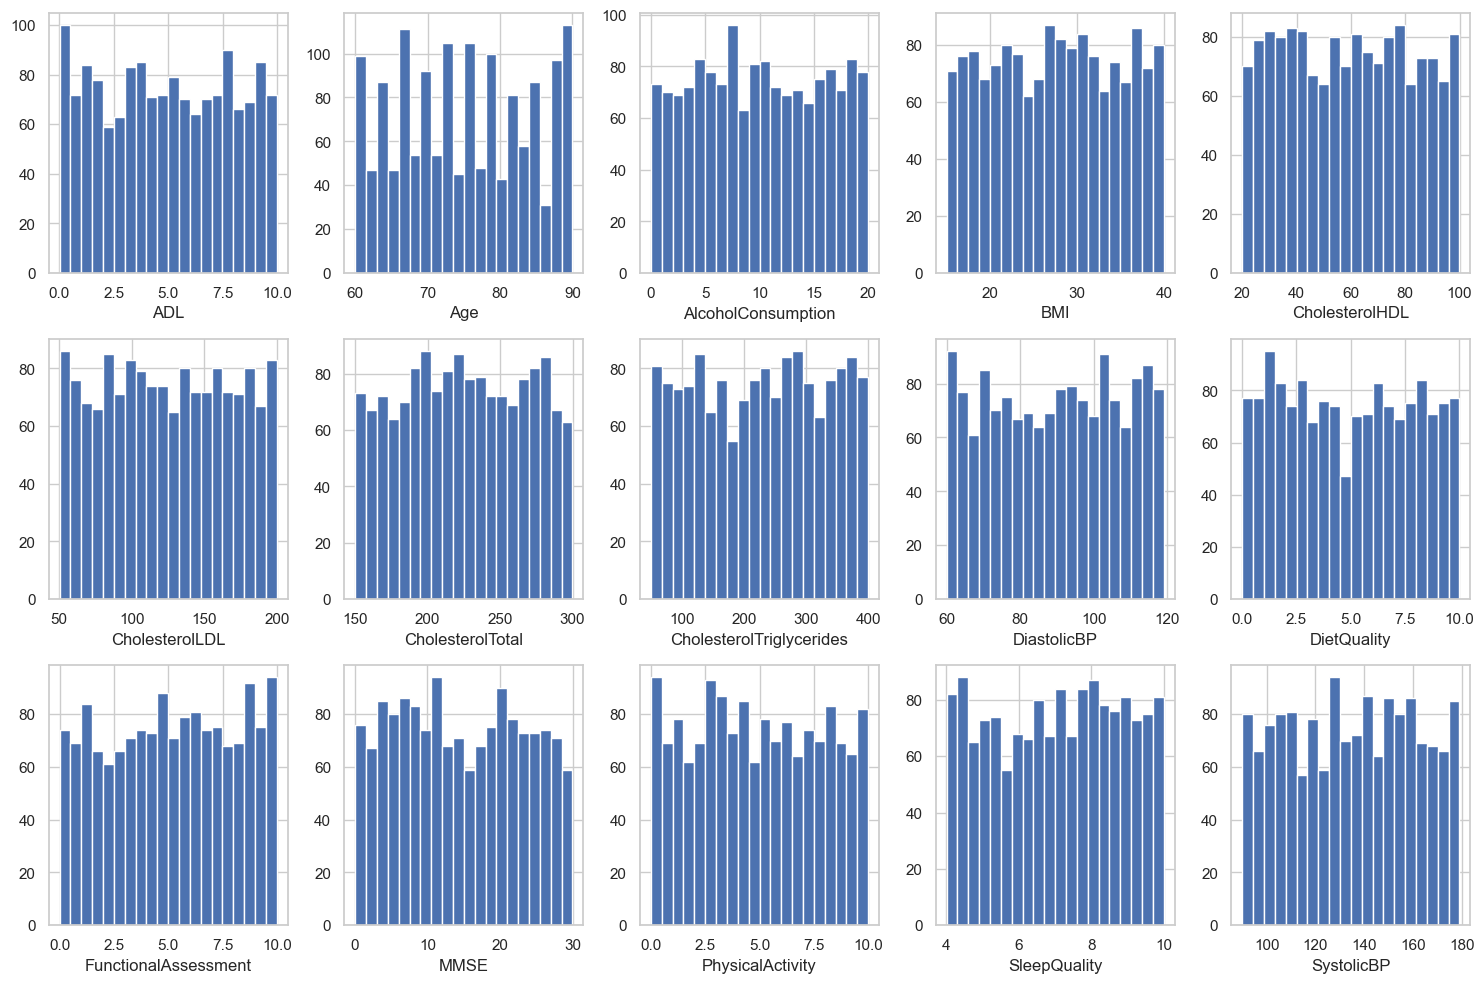

In [34]:
# find numerical variables
numerical = all_variables.difference(categorical)
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
# we already know that there are no missing values in categorical variables :)

# view summary statistics in numerical variables
print(round(df[numerical].describe()))


# draw boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 5, i)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# plot histogram to check distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 5, i)
    fig = df[col].hist(bins = 20)
    fig.set_xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


STEP3: Declare feature vector and target variable

In [35]:
# Define features (X) and target variable (y)
X = df.drop(['PatientID', 'Diagnosis', "DoctorInCharge"], axis=1)
y = df['Diagnosis']
print("\nFeatures and target variable defined.")


Features and target variable defined.


STEP4: Split data, OOB?

In [36]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1128, 32), (376, 32))

STEP5: Feature Engineering
Notice there are no missing values for all variables, so we don't need to engineering missing values here.
Since we don't see any skewed distribution for our numerical variables, we don't deal with outliers.
We don't need to encode categorical variables

STEP6: Feature scaling

In [37]:
X_train.describe()
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,...,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,0.492258,0.505319,0.240248,0.430851,0.500901,0.287234,0.496772,0.487224,0.498839,0.507767,...,0.495189,0.517170,0.202128,0.148936,0.489668,0.184397,0.148050,0.159574,0.164007,0.300532
std,0.297137,0.500193,0.336283,0.301735,0.284645,0.452672,0.287098,0.288955,0.293404,0.292157,...,0.286543,0.292127,0.401765,0.356183,0.294012,0.387980,0.355307,0.366373,0.370446,0.458693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,0.333333,0.254608,0.000000,0.257634,0.246919,0.233444,0.251690,...,0.245248,0.265532,0.000000,0.000000,0.235300,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,0.333333,0.511034,0.000000,0.491565,0.472053,0.505338,0.518118,...,0.488913,0.519541,0.000000,0.000000,0.485450,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.733333,1.000000,0.333333,0.666667,0.741618,1.000000,0.753388,0.736284,0.757617,0.758654,...,0.736698,0.774831,0.000000,0.000000,0.747848,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


STEP7: Model training

In [38]:
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product

# Define the parameter grid
param_grid = {
    'n_estimators': list(range(1, 400, 3)),
    'max_depth': list(range(1, 13, 2)) + [2],
    'min_samples_split': [2, 3, 4, 7],
    'min_samples_leaf': [1, 2, 4, 7],
    'max_features': ['sqrt']
}

# Function to train and evaluate a model with given parameters
def train_evaluate(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features = params
    rfc = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0
    )
    # Fit the model on the training data
    rfc.fit(X_train, y_train)
    # Predict on the test set
    y_pred = rfc.predict(X_test)
    # Calculate accuracy score on the test set
    acc_score = accuracy_score(y_test, y_pred)
    return (acc_score, params, rfc)

# Create a list of all parameter combinations
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    param_grid['max_features']
))

print('number of tasks is: ' + str(len(param_combinations)))

# Use Parallel to evaluate all combinations
results = Parallel(n_jobs=4, verbose=10)(
    delayed(train_evaluate)(params) for params in param_combinations
)

# Find the best model based on accuracy score
best_acc_score, best_params, best_model = max(results, key=lambda x: x[0])

# Output the results
print("Best Parameters:", best_params)
print("Best Accuracy Score on Test Set:", best_acc_score)

# Evaluate on the test set (already done in the loop)
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", test_accuracy)


number of tasks is: 14896


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.18578022984415815s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.02898716926574707s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.05022740364074707s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.10665202140808105s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 156 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 332 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 540 tasks      | elapsed:    

Best Parameters: (151, 11, 3, 1, 'sqrt')
Best Accuracy Score on Test Set: 0.9521276595744681


In [41]:
final_model = best_model
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.9521276595744681

In [40]:
# Load and preprocess the test data
test_data = pd.read_csv('test.csv')
X_test_final = test_data.drop(['PatientID', 'DoctorInCharge'], axis=1)
X_test_final_scaled = scaler.transform(X_test_final)

# Make predictions with a custom threshold of 0.35
test_predictions = final_model.predict(X_test_final_scaled)  # Get probabilities for the positive class


# Prepare and save the submission file
submission = pd.DataFrame({
    'PatientID': test_data['PatientID'],
    'Diagnosis': test_predictions
})

# Save to CSV
submission.to_csv('test_predictions_final_random_forest.csv', index=False)
print("\nSubmission file 'test_predictions.csv' created successfully with the following format:")
print(submission.head())


Submission file 'test_predictions.csv' created successfully with the following format:
   PatientID  Diagnosis
0       1505          1
1       1506          0
2       1507          0
3       1508          0
4       1509          1
